In [66]:
import os
import sys

script_dir = os.getcwd()
project_root = os.path.abspath(script_dir)

if project_root not in sys.path:
    sys.path.insert(0, project_root)

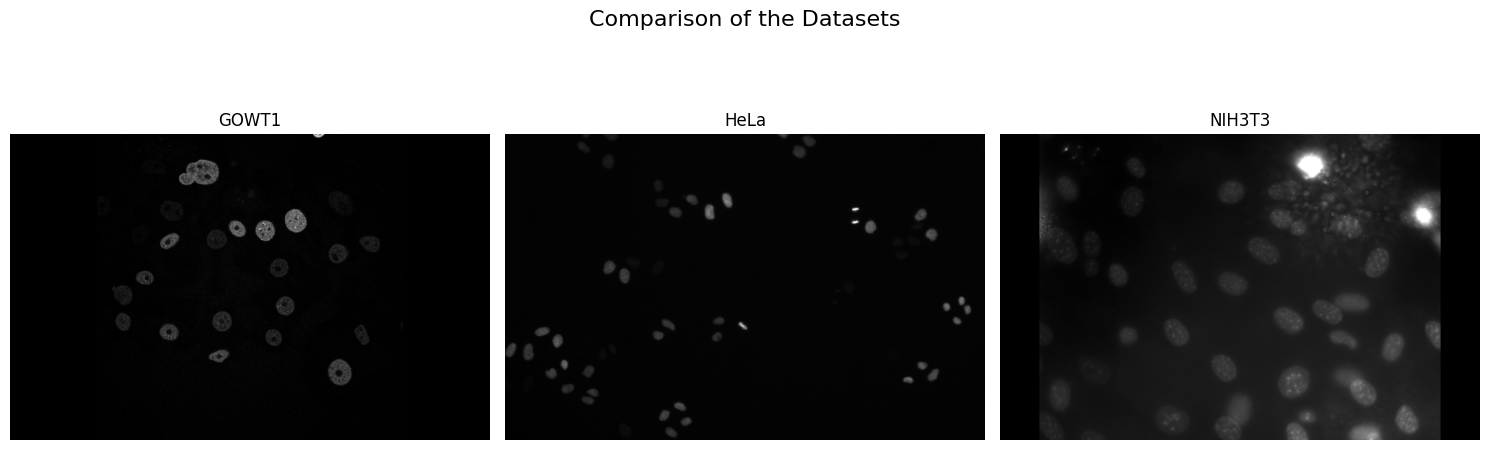

In [65]:
from src.find_image import find_and_load_image

img_gowt1 = find_and_load_image("t01.tif")
img_hela = find_and_load_image("t13.tif")
img_nih3t3 = find_and_load_image("dna-33.png")


from src.show_imgs import plot_images_fixed_size

images_img = [img_gowt1, img_hela, img_nih3t3]
titles_img = ["GOWT1", "HeLa", "NIH3T3"]

plot_images_fixed_size(images_img, titles=titles_img, main_title="Comparison of the Datasets")

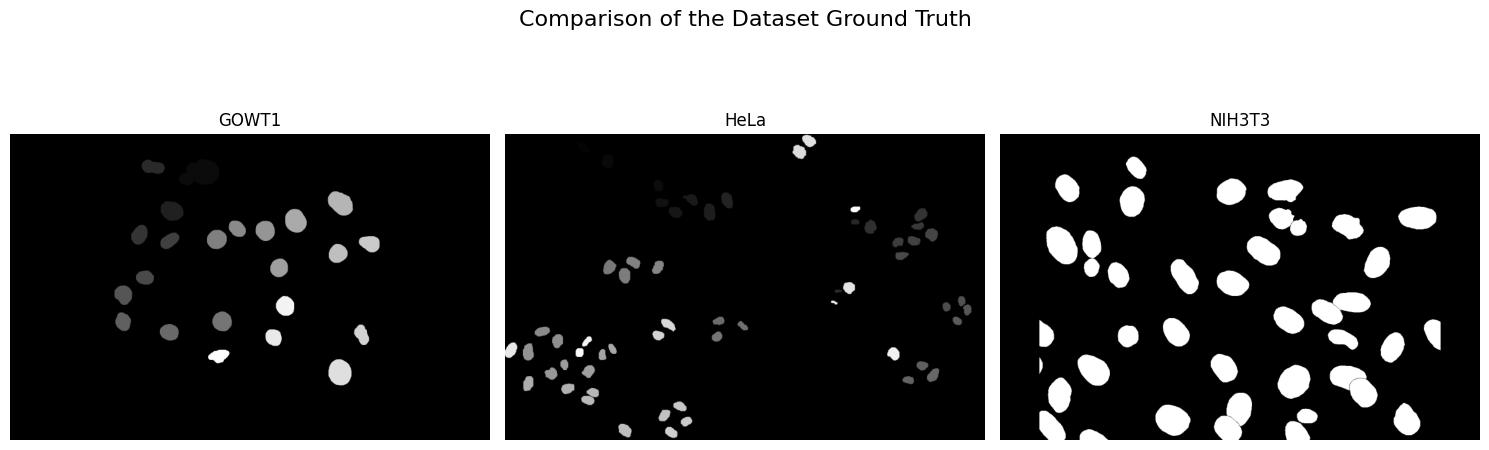

In [64]:
gt_gowt1 = find_and_load_image("man_seg01.tif")
gt_hela = find_and_load_image("man_seg13.tif")
gt_nih3t3 = find_and_load_image("33.png")


images_gt = [gt_gowt1, gt_hela, gt_nih3t3]
titles_gt = ["GOWT1", "HeLa", "NIH3T3"]

plot_images_fixed_size(images_gt, titles = titles_gt, main_title = "Comparison of the Dataset Ground Truth")

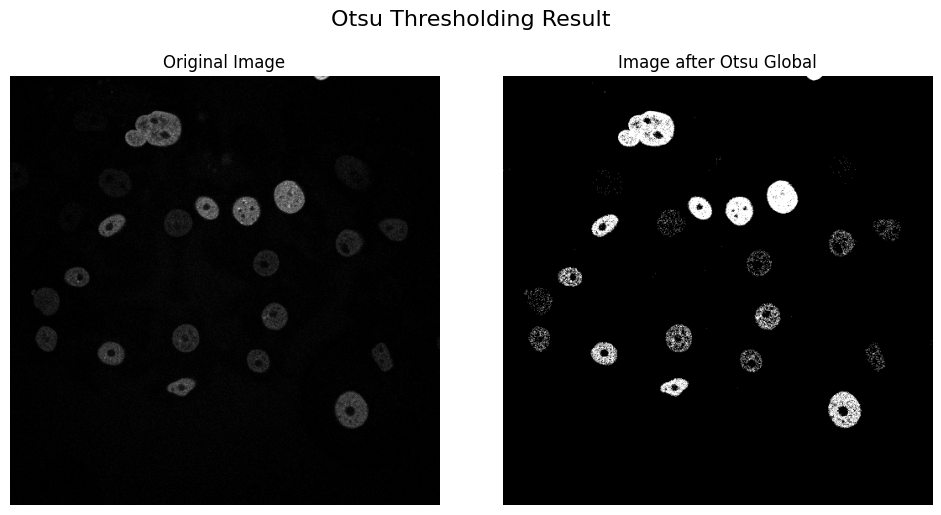

In [63]:
from src.Complete_Otsu_Global import otsu_threshold_skimage_like

threshold = otsu_threshold_skimage_like(img_gowt1)
img_gowt1_otsu_global = (img_gowt1 > threshold).astype(int)


plot_images_fixed_size(
    images=[img_gowt1, img_gowt1_otsu_global],
    titles=["Original Image", "Image after Otsu Global"],
    main_title="Otsu Thresholding Result"
)

In [62]:
# takes very long

from src.Otsu_Local import local_otsu

thresholds_local = local_otsu(img_gowt1, radius = 15)
img_gowt1_otsu_local = (img_gowt1 > thresholds_local).astype(int)


plot_images_fixed_size(
    images=[img_gowt1, img_gowt1_otsu_local],
    titles=["Original Image", "Image after Otsu Local"],
    main_title="Local Otsu Thresholding Result\n(Radius = 15)"
)

Processing row 1/1024...


KeyboardInterrupt: 

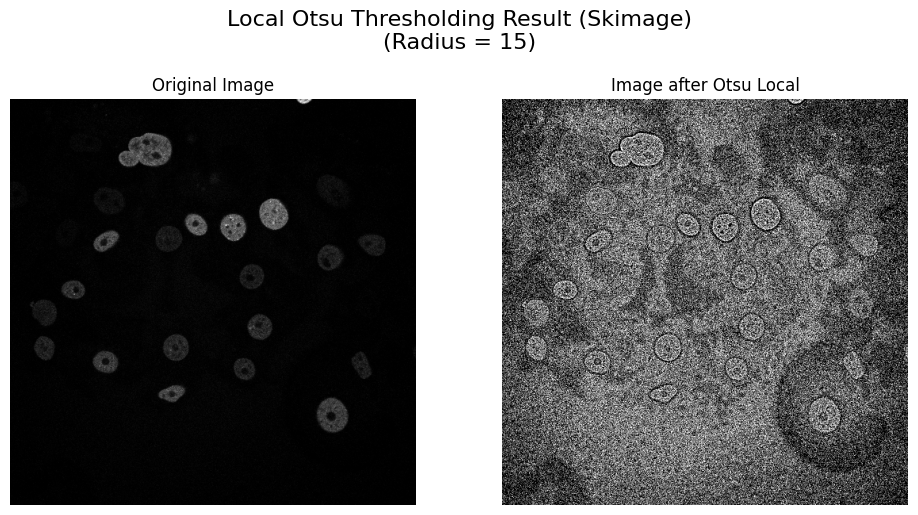

In [76]:
# Package Otsu Local for visualisation for time efficiency
from skimage.filters import threshold_local

thresholds_local = threshold_local(img_gowt1, block_size=15, offset=0)
img_gowt1_otsu_local = (img_gowt1 > thresholds_local).astype(int)

plot_images_fixed_size(
    images=[img_gowt1, img_gowt1_otsu_local],
    titles=["Original Image", "Image after Otsu Local"],
    main_title="Local Otsu Thresholding Result (Skimage)\n(Radius = 15)"
)

In [77]:
import importlib

import src.Dice_Score


importlib.reload(src.Dice_Score)

from src.Dice_Score import dice_score

dice_score_gowt1_global = dice_score(img_gowt1_otsu_global, gt_gowt1) 

dice_score_gowt1_local = dice_score(img_gowt1_otsu_local, gt_gowt1)


print("Dice Score Otsu Global:", dice_score_gowt1_global)
print("Dice Score Otsu Local:", dice_score_gowt1_local)

Dice Score Otsu Global: 0.5705017182130584
Dice Score Otsu Local: 0.1625783041495708


In [78]:
# Imports from project-specific src/ directory
from src.imread_all import load_n2dh_gowt1_images, load_n2dl_hela_images, load_nih3t3_images


# Load images and ground-truth masks from the datasets
imgs_N2DH_GOWT1, gts_N2DH_GOWT1, img_paths_N2DH_GOWT1, gt_paths_N2DH_GOWT1 = load_n2dh_gowt1_images()
imgs_N2DL_HeLa, gts_N2DL_HeLa, img_paths_N2DL_HeLa, gt_paths_N2DL_HeLa = load_n2dl_hela_images()
imgs_NIH3T3, gts_NIH3T3, img_paths_NIH3T3, gt_paths_NIH3T3 = load_nih3t3_images()

In [ ]:
from src.Dice_Score_comparison import calculate_dice_scores_global

# Compute Dice scores for each dataset
dice_all_gowt1_global = calculate_dice_scores_global(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)
dice_all_hela_global = calculate_dice_scores_global(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_all_nih_global = calculate_dice_scores_global(imgs_NIH3T3, gts_NIH3T3)

# Convert numpy floats to plain Python floats for clearer output
dice_all_gowt1_global = [float(score) for score in dice_all_gowt1_global]
dice_all_hela_global = [float(score) for score in dice_all_hela_global]
dice_all_nih_global = [float(score) for score in dice_all_nih_global]

# Print scores in a readable format
print("GOWT1_Scores_global =", ", ".join(f"{score}" for score in dice_all_gowt1_global))
print("HeLa_Scores_global =", ", ".join(f"{score}" for score in dice_all_hela_global))
print("NIH3T3_Scores_global =", ", ".join(f"{score}" for score in dice_all_nih_global))



GOWT1_Scores_global = 0.5705017182130584, 0.32258217915948406, 0.568002229254991, 0.6271474725294504, 0.6502180828858916, 0.6615248976783192
HeLa_Scores_global = 0.6923060104510571, 0.649295517879001, 0.7760944676315427, 0.7761119912979735
NIH3T3_Scores_global = 0.9128436675562167, 0.8845252721173281, 0.8225479821936802, 0.758336987687637, 0.7528567225654604, 0.647632667167185, 0.6466958730507323, 0.7237186625334818, 0.03500481623642597, 0.46518566600901357, 0.0, 0.6762501531852865, 0.00026339009389856846, 0.5757554586315079, 0.6165448260228947, 0.07605520913993832, 0.07186834004262373, 0.7925039681767514


In [80]:
# takes very long
from src.Dice_Score_comparison import calculate_dice_scores_local

# Compute Dice scores for each dataset
dice_all_gowt1_local = calculate_dice_scores_local(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)
dice_all_hela_local = calculate_dice_scores_local(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_all_nih_local = calculate_dice_scores_local(imgs_NIH3T3, gts_NIH3T3)

# Convert numpy floats to plain Python floats for clearer output
dice_all_gowt1_local = [float(score) for score in dice_all_gowt1_local]
dice_all_hela_local = [float(score) for score in dice_all_hela_local]
dice_all_nih_local = [float(score) for score in dice_all_nih_local]

# Print scores in a readable format
print("GOWT1_Scores_local =", ", ".join(f"{score}" for score in dice_all_gowt1_local))
print("HeLa_Scores_local =", ", ".join(f"{score}" for score in dice_all_hela_local))
print("NIH3T3_Scores_local =", ", ".join(f"{score}" for score in dice_all_nih_local))

Processing row 1/1024...
Processing row 51/1024...


KeyboardInterrupt: 

In [81]:
# Package Otsu Local for visualisation for time efficiency
from src.Dice_Score_comparison import calculate_dice_scores_local_package

# Compute Dice scores for each dataset
dice_all_gowt1_local = calculate_dice_scores_local_package(imgs_N2DH_GOWT1, gts_N2DH_GOWT1)
dice_all_hela_local = calculate_dice_scores_local_package(imgs_N2DL_HeLa, gts_N2DL_HeLa)
dice_all_nih_local = calculate_dice_scores_local_package(imgs_NIH3T3, gts_NIH3T3)

# Convert numpy floats to plain Python floats for clearer output
dice_all_gowt1_local = [float(score) for score in dice_all_gowt1_local]
dice_all_hela_local = [float(score) for score in dice_all_hela_local]
dice_all_nih_local = [float(score) for score in dice_all_nih_local]

# Print scores in a readable format
print("GOWT1_Scores_local =", list(dice_all_gowt1_local))
print("HeLa_Scores_local =", list(dice_all_hela_local))
print("NIH3T3_Scores_local =", list(dice_all_nih_local))

GOWT1_Scores_local = [0.17753002655626046, 0.14881122364626792, 0.1581097146912299, 0.16636302540060405, 0.21184536245369476, 0.24176739061615887]
HeLa_Scores_local = [0.12681392194654348, 0.22058378194395434, 0.7145416936492868, 0.7209252373673444]
NIH3T3_Scores_local = [0.25049477381768337, 0.2687685182262189, 0.3484725943766865, 0.34536836298795426, 0.31031052433757284, 0.27648412483165696, 0.3682908336736804, 0.4013789216903318, 0.3289368054331053, 0.29559274196337776, 0.3233109980127425, 0.30894142901699445, 0.27776858136070187, 0.407150525262475, 0.3158035101131886, 0.3073452021431498, 0.26975665051101894, 0.39521273659531875]


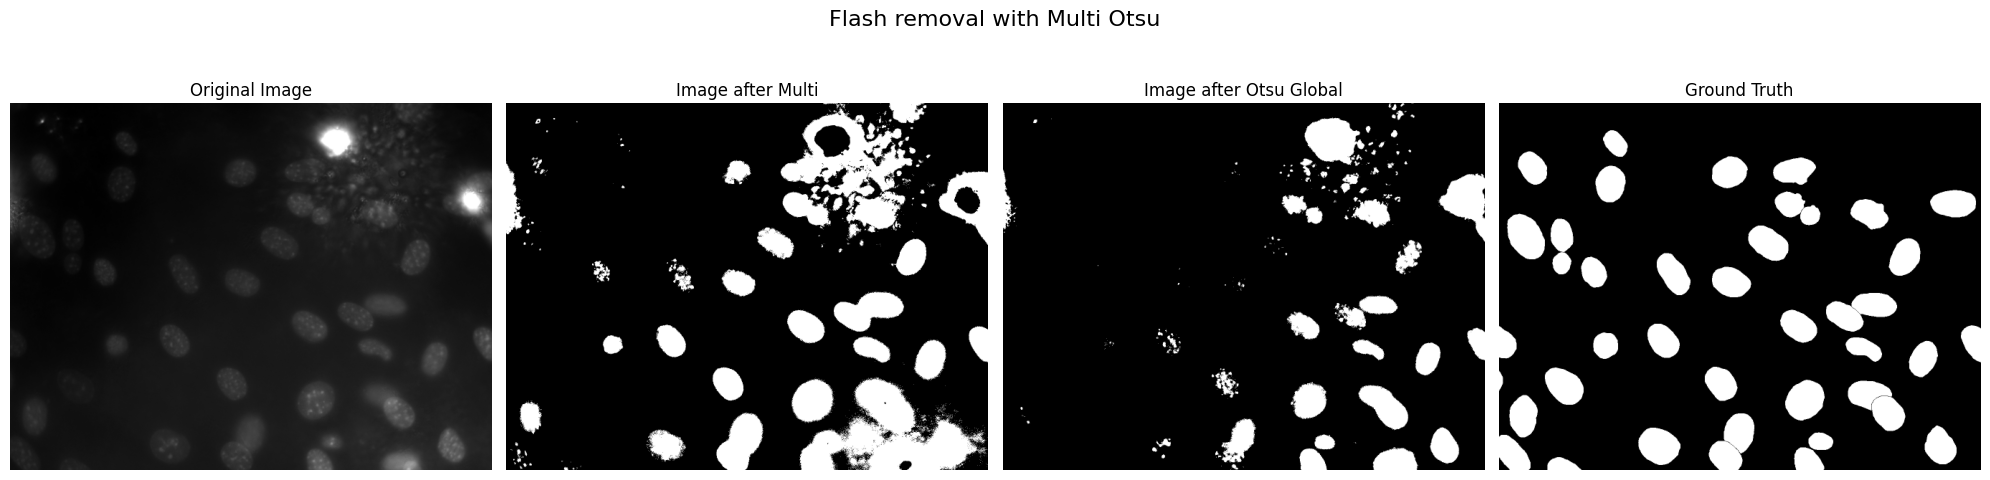

In [ ]:
from src.multi import apply_multiotsu_mask_class1_foreground


img_nih3t3_multi = apply_multiotsu_mask_class1_foreground(img_nih3t3).astype(int)
threshold_nih3t3_global = otsu_threshold_skimage_like(img_nih3t3)

img_nih3t3_otsu_global = (img_nih3t3 > threshold_nih3t3_global).astype(int)

plot_images_fixed_size(
    images=[img_nih3t3, img_nih3t3_multi,img_nih3t3_otsu_global, gt_nih3t3],
    titles=["Original Image", "Image after Multi", "Image after Otsu Global", "Ground Truth"],
    main_title = "Flash removal with Multi Otsu"
)

In [ ]:
import importlib

import src.Plots


importlib.reload(src.Plots)

from src.Plots import scatterplot_without_regression, plot_pairwise_scores
from src.multi import calculate_multiotsu_dice_scores

dice_all_nih_multi = calculate_multiotsu_dice_scores(imgs_NIH3T3, gts_NIH3T3)

scatterplot_without_regression(
    dice_all_nih_multi,
    dice_all_nih_global,
    xlabel="Dice Score Multi Otsu",
    ylabel="Dice Score Global Otsu",
    title="Multi vs Global Otsu\nNIH3T3 Dataset",
    label_red = "Multi is worse",
    label_green = "Multi is better",
    label_blue = "equal"
)

SyntaxError: invalid syntax (2032294271.py, line 12)